## Hopfield. Collective memory. Recall experiment, based on the learned graphs

Goal: Verify if the learned weight-matrix can be used as a Hopfield network. If so, the main signal (corresponding to the month and main events) should be emphasized.

Experiment step-by-step:
1. Take a month-learned graph.
2. Extract learned weight-matrix.
3. Take signal, that was used to learn the graph.
4. Emulate recall, using Hopfield model (dot product of signal and weight-matrix).
5. Observe, if the recalled signal emphsizes the main signal.

### Import graph from GEXF and extract adjacency matrix

In [1]:
import networkx as nx

In [2]:
graph = nx.read_gexf("/mnt/data/git/WikiBrain/src/main/resources/graph.gexf")

In [3]:
W = nx.adjacency_matrix(graph).todense()

Make adjacency symmetric

In [4]:
import numpy as np
W = np.maximum( W, W.transpose() )

In [5]:
from matplotlib import pyplot as pl
import matplotlib.colors as colors
%matplotlib inline

In [6]:
# pl.imshow(W, cmap='Greys', norm=colors.PowerNorm(gamma=1./100.))
# pl.colorbar()

In [7]:
W.shape

(7794, 7794)

### Signal

In [8]:
with open("/mnt/data/git/WikiBrain/src/main/resources/signal.txt") as f:
    content = f.readlines()

In [9]:
content = content[0]

In [10]:
content = content.split(']')

In [11]:
content = map(lambda row: row.strip('[').replace('.0',''),content)

In [12]:
content = map(lambda row: row.split(','), content)

In [13]:
content = [[float(x) for x in row if x != ''] for row in content]

In [14]:
content = content[0:7794]

In [128]:
def binary(x):
    if x>0.0:
        x = 1.0
    else: x = -1.0
    return x

In [129]:
binarized = np.array([[binary(x) for x in row] for row in content])

### Plot

In [165]:
months = ['October', 'November', 'December', 'January', 'February', 'March', 'April']
x_month = [i for i in np.arange(8*24, len(content[0]), 30*24)]
x_month[1] = x_month[1] + 24 #October
x_month[2] = x_month[2] + 24 #November
x_month[3] = x_month[3] + 48 #December
x_month[4] = x_month[4] + 72 #January
x_month[5] = x_month[5] + 24 #February
x_month[6] = x_month[6] + 48 #March
x_month[7] = x_month[7] + 48 #April

### Original signal

In [183]:
summary = [sum(l) for l in binarized.T]

In [206]:
from pylab import rcParams
rcParams['figure.figsize'] = 90, 40
rcParams['xtick.labelsize'] = 70
rcParams['ytick.labelsize'] = 50

([<matplotlib.axis.XTick at 0x7fe00fcd8210>,
 <a list of 7 Text xticklabel objects>)

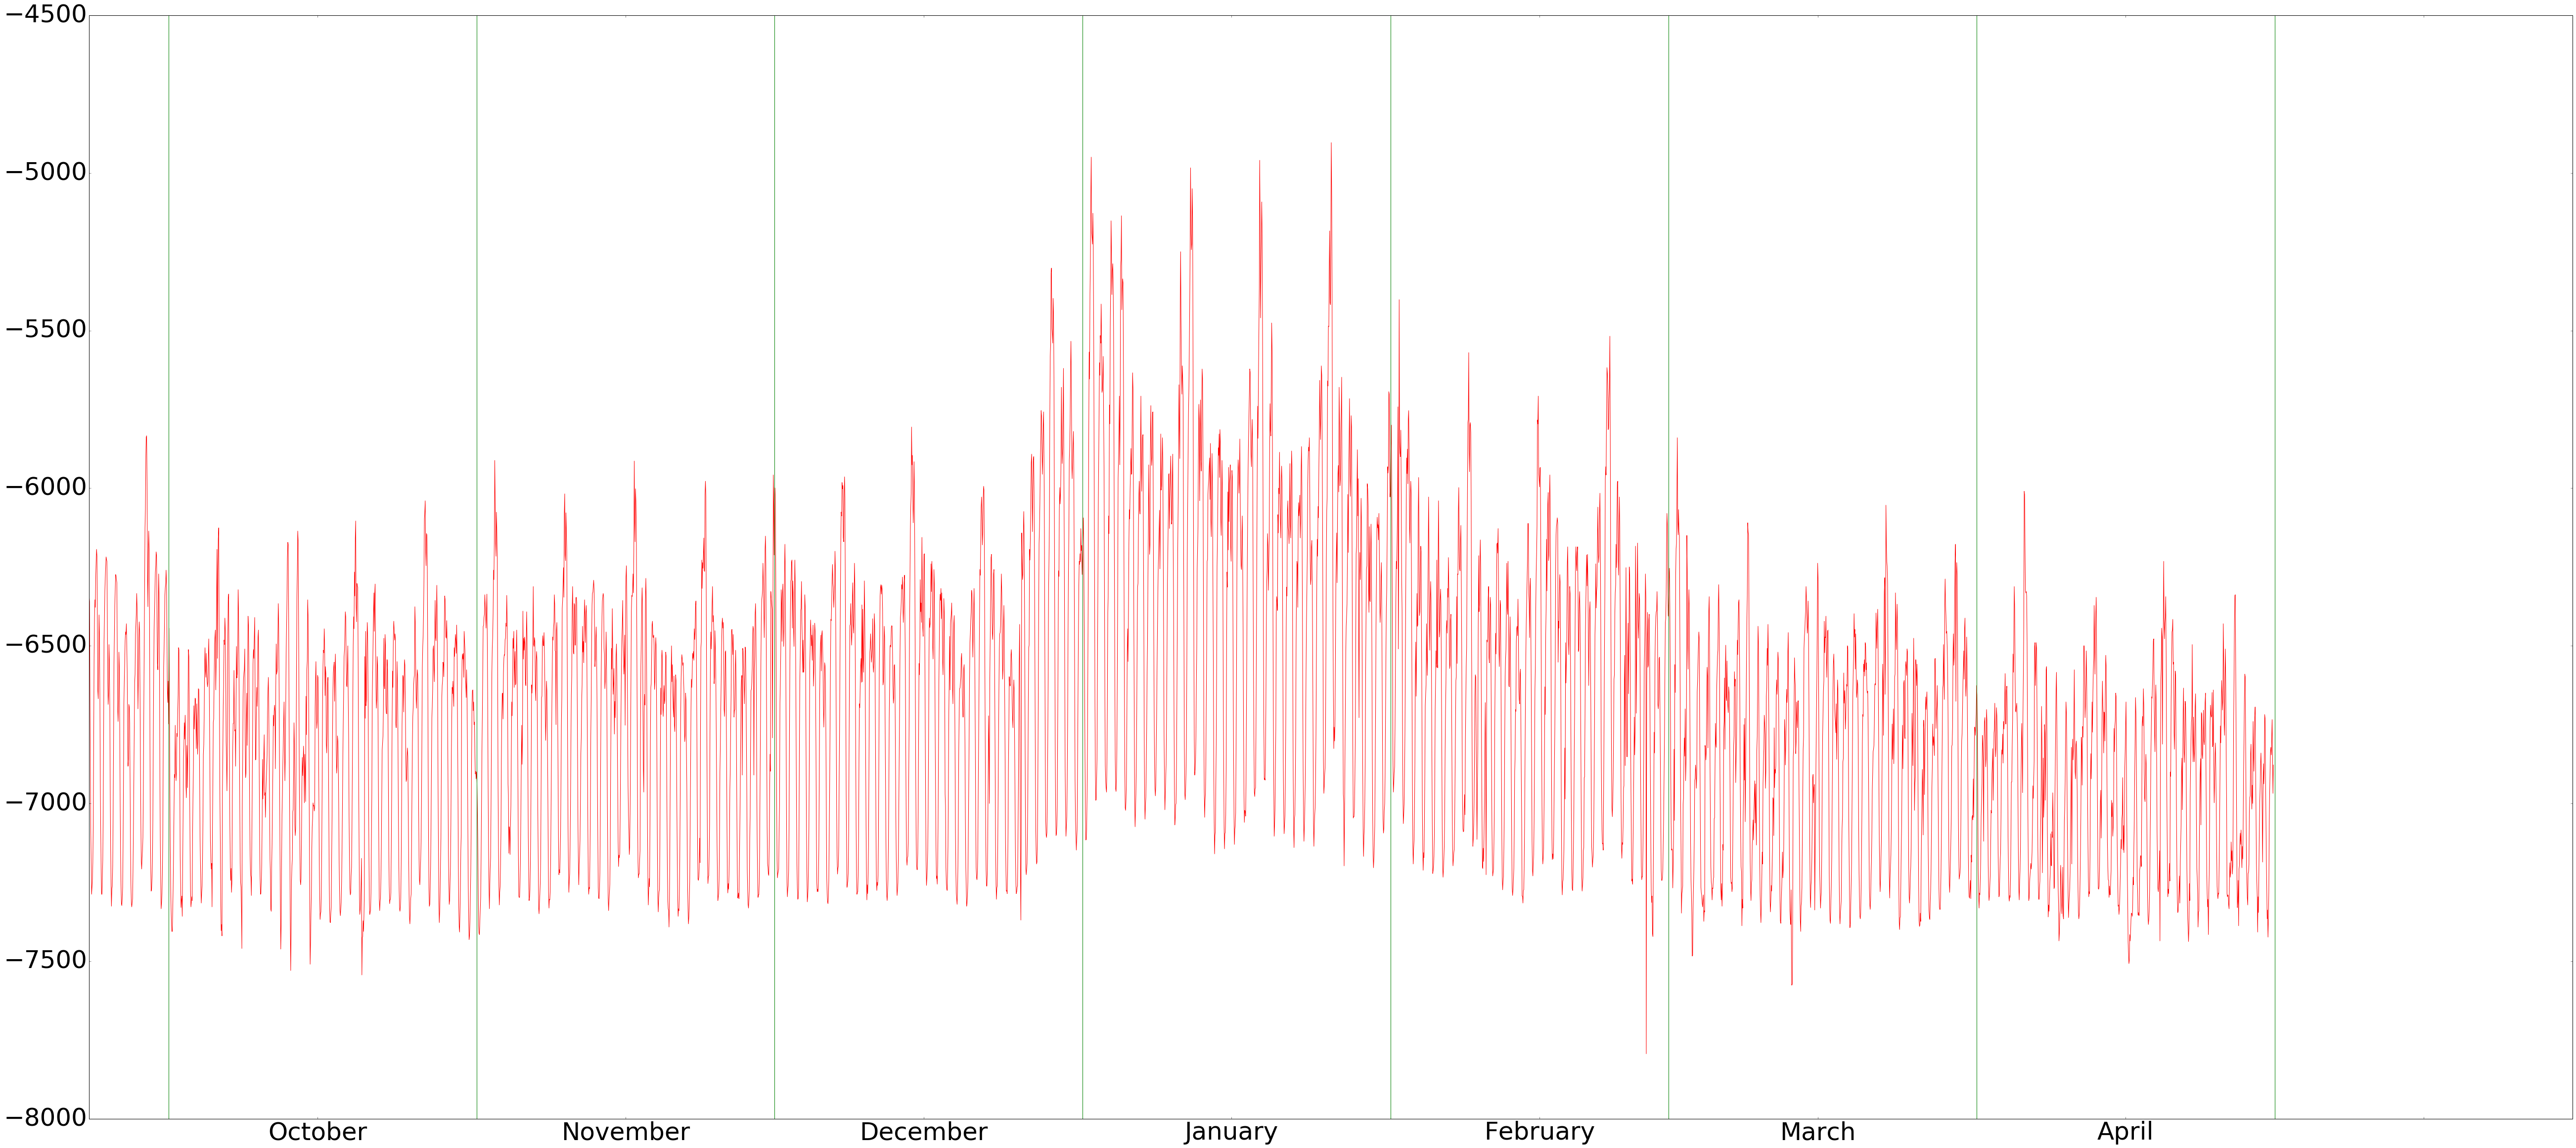

In [184]:
pl.plot(summary, 'r')
for xc in x_month:
    pl.axvline(x=xc, linewidth=1, color = 'g')
pl.xticks([i + 15*24 for i in x_month], [month for month in months])

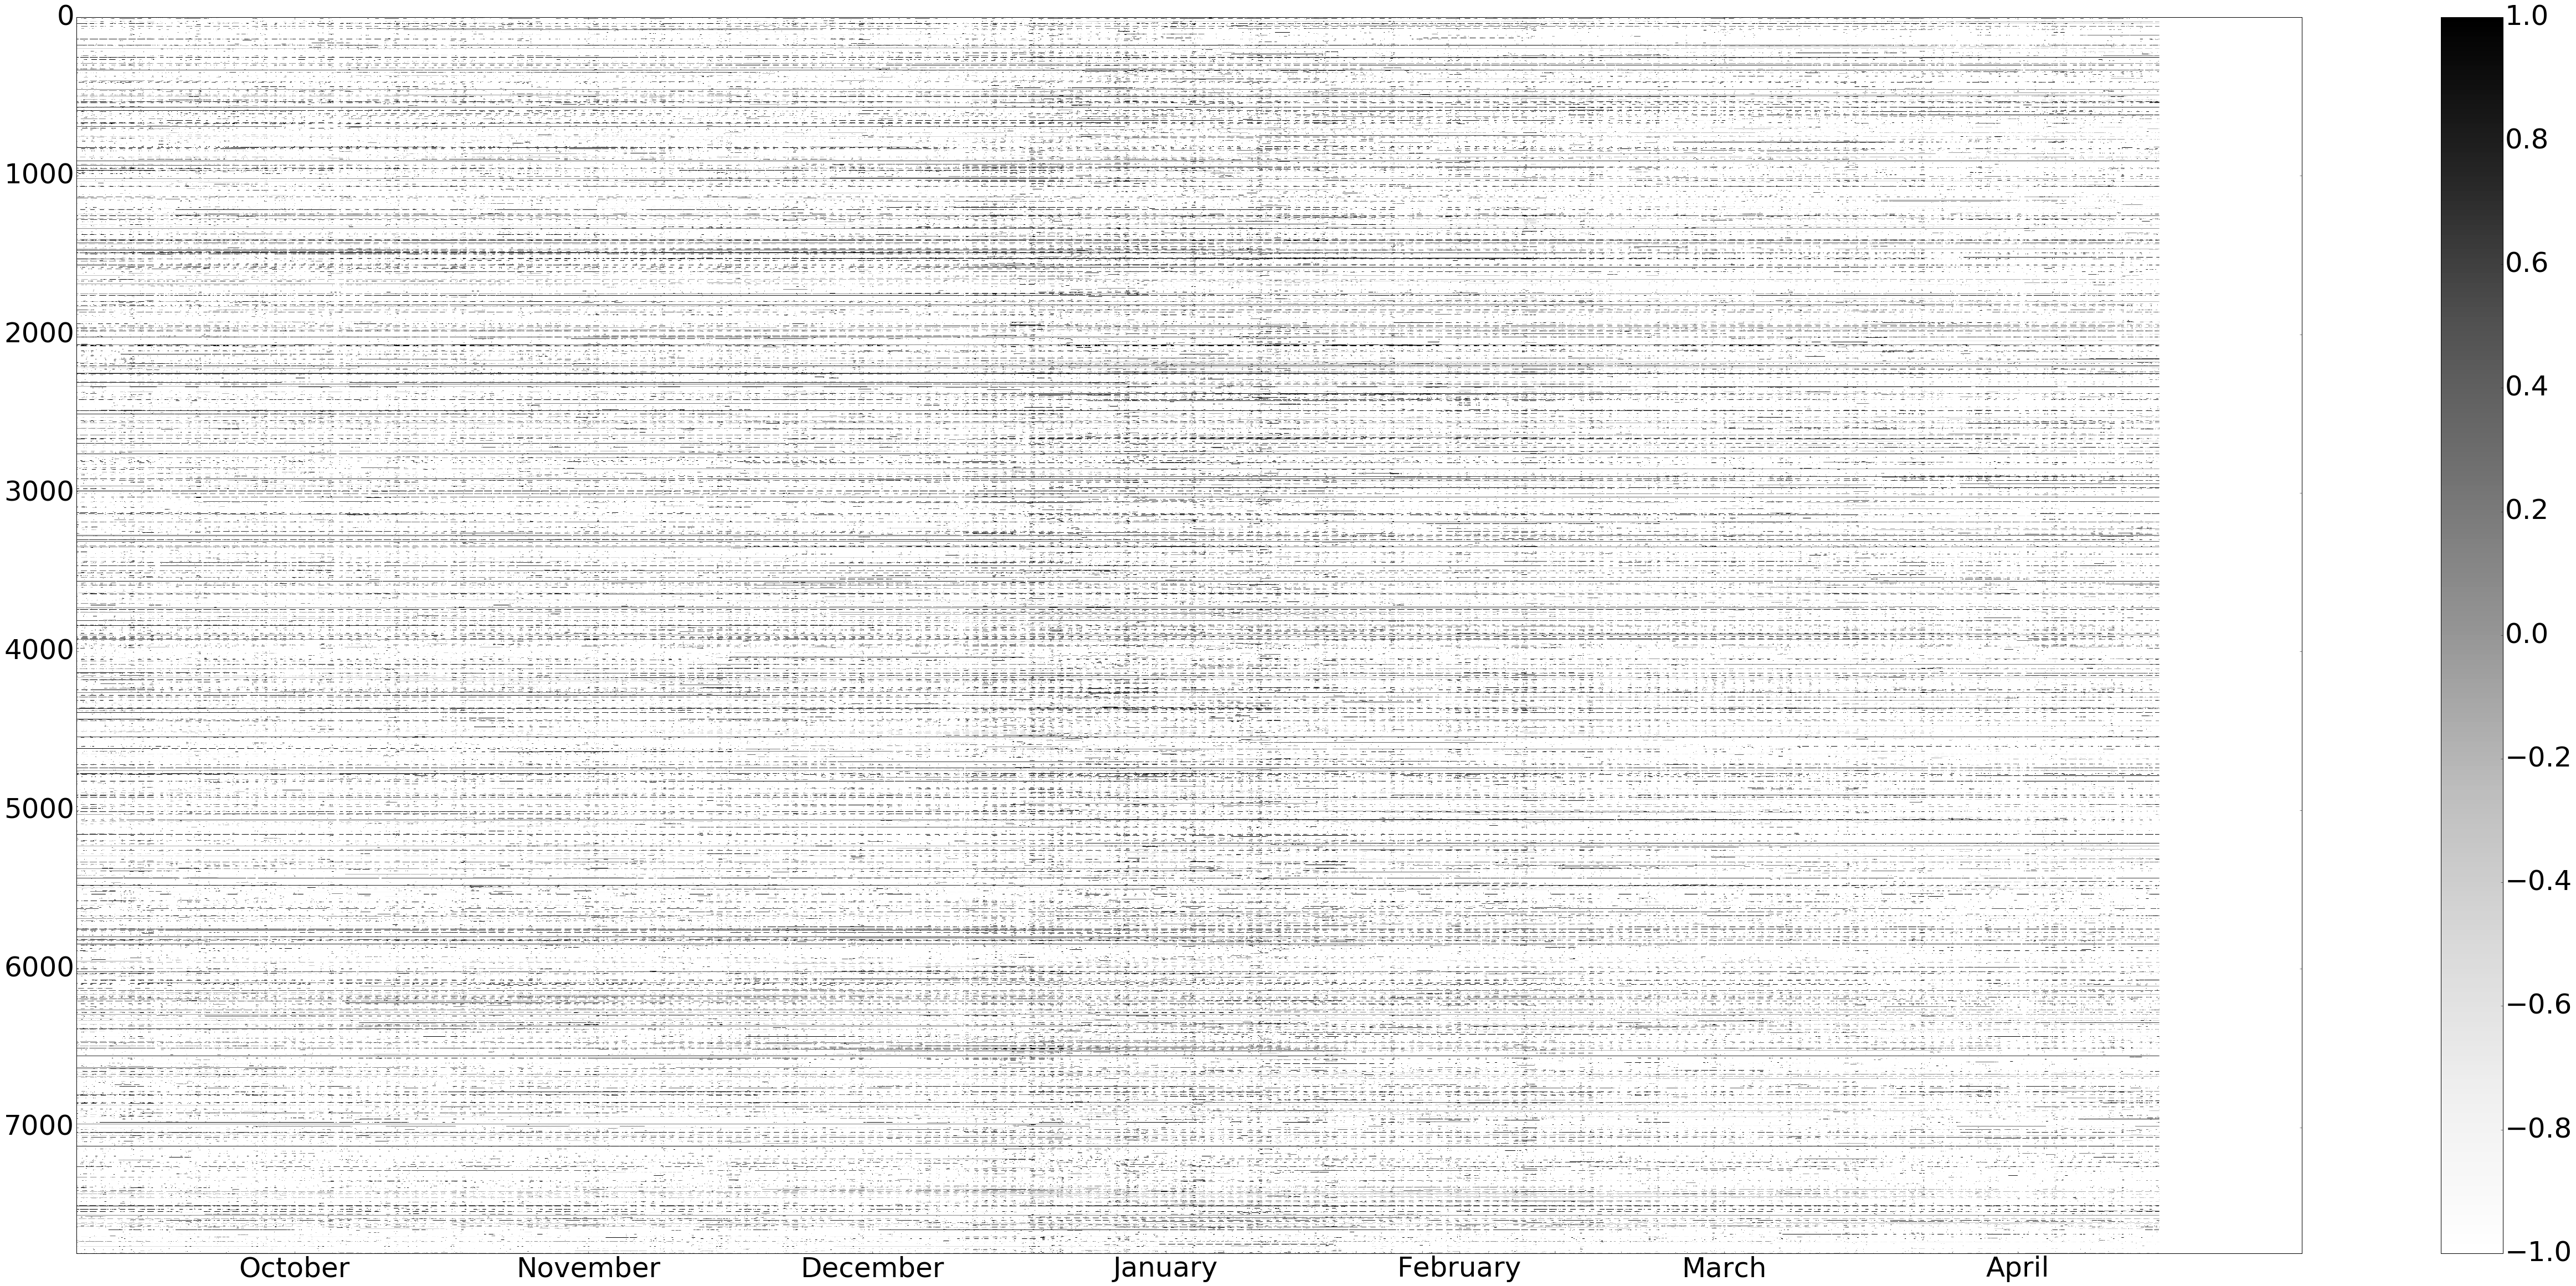

In [172]:
pl.imshow(binarized, cmap='Greys', aspect='auto')
pl.xticks([i + 15*24 for i in x_month], [month for month in months])
pl.colorbar()

### Degraded signal

In [173]:
def degrade(patterns,noise):
    #This allows you to add noise to a pattern
    sgn=np.vectorize(lambda x: x*-1 if np.random.random()<noise else x)
    out=sgn(patterns)
    return out

In [174]:
degraded = degrade(np.array(binarized), 0.0)

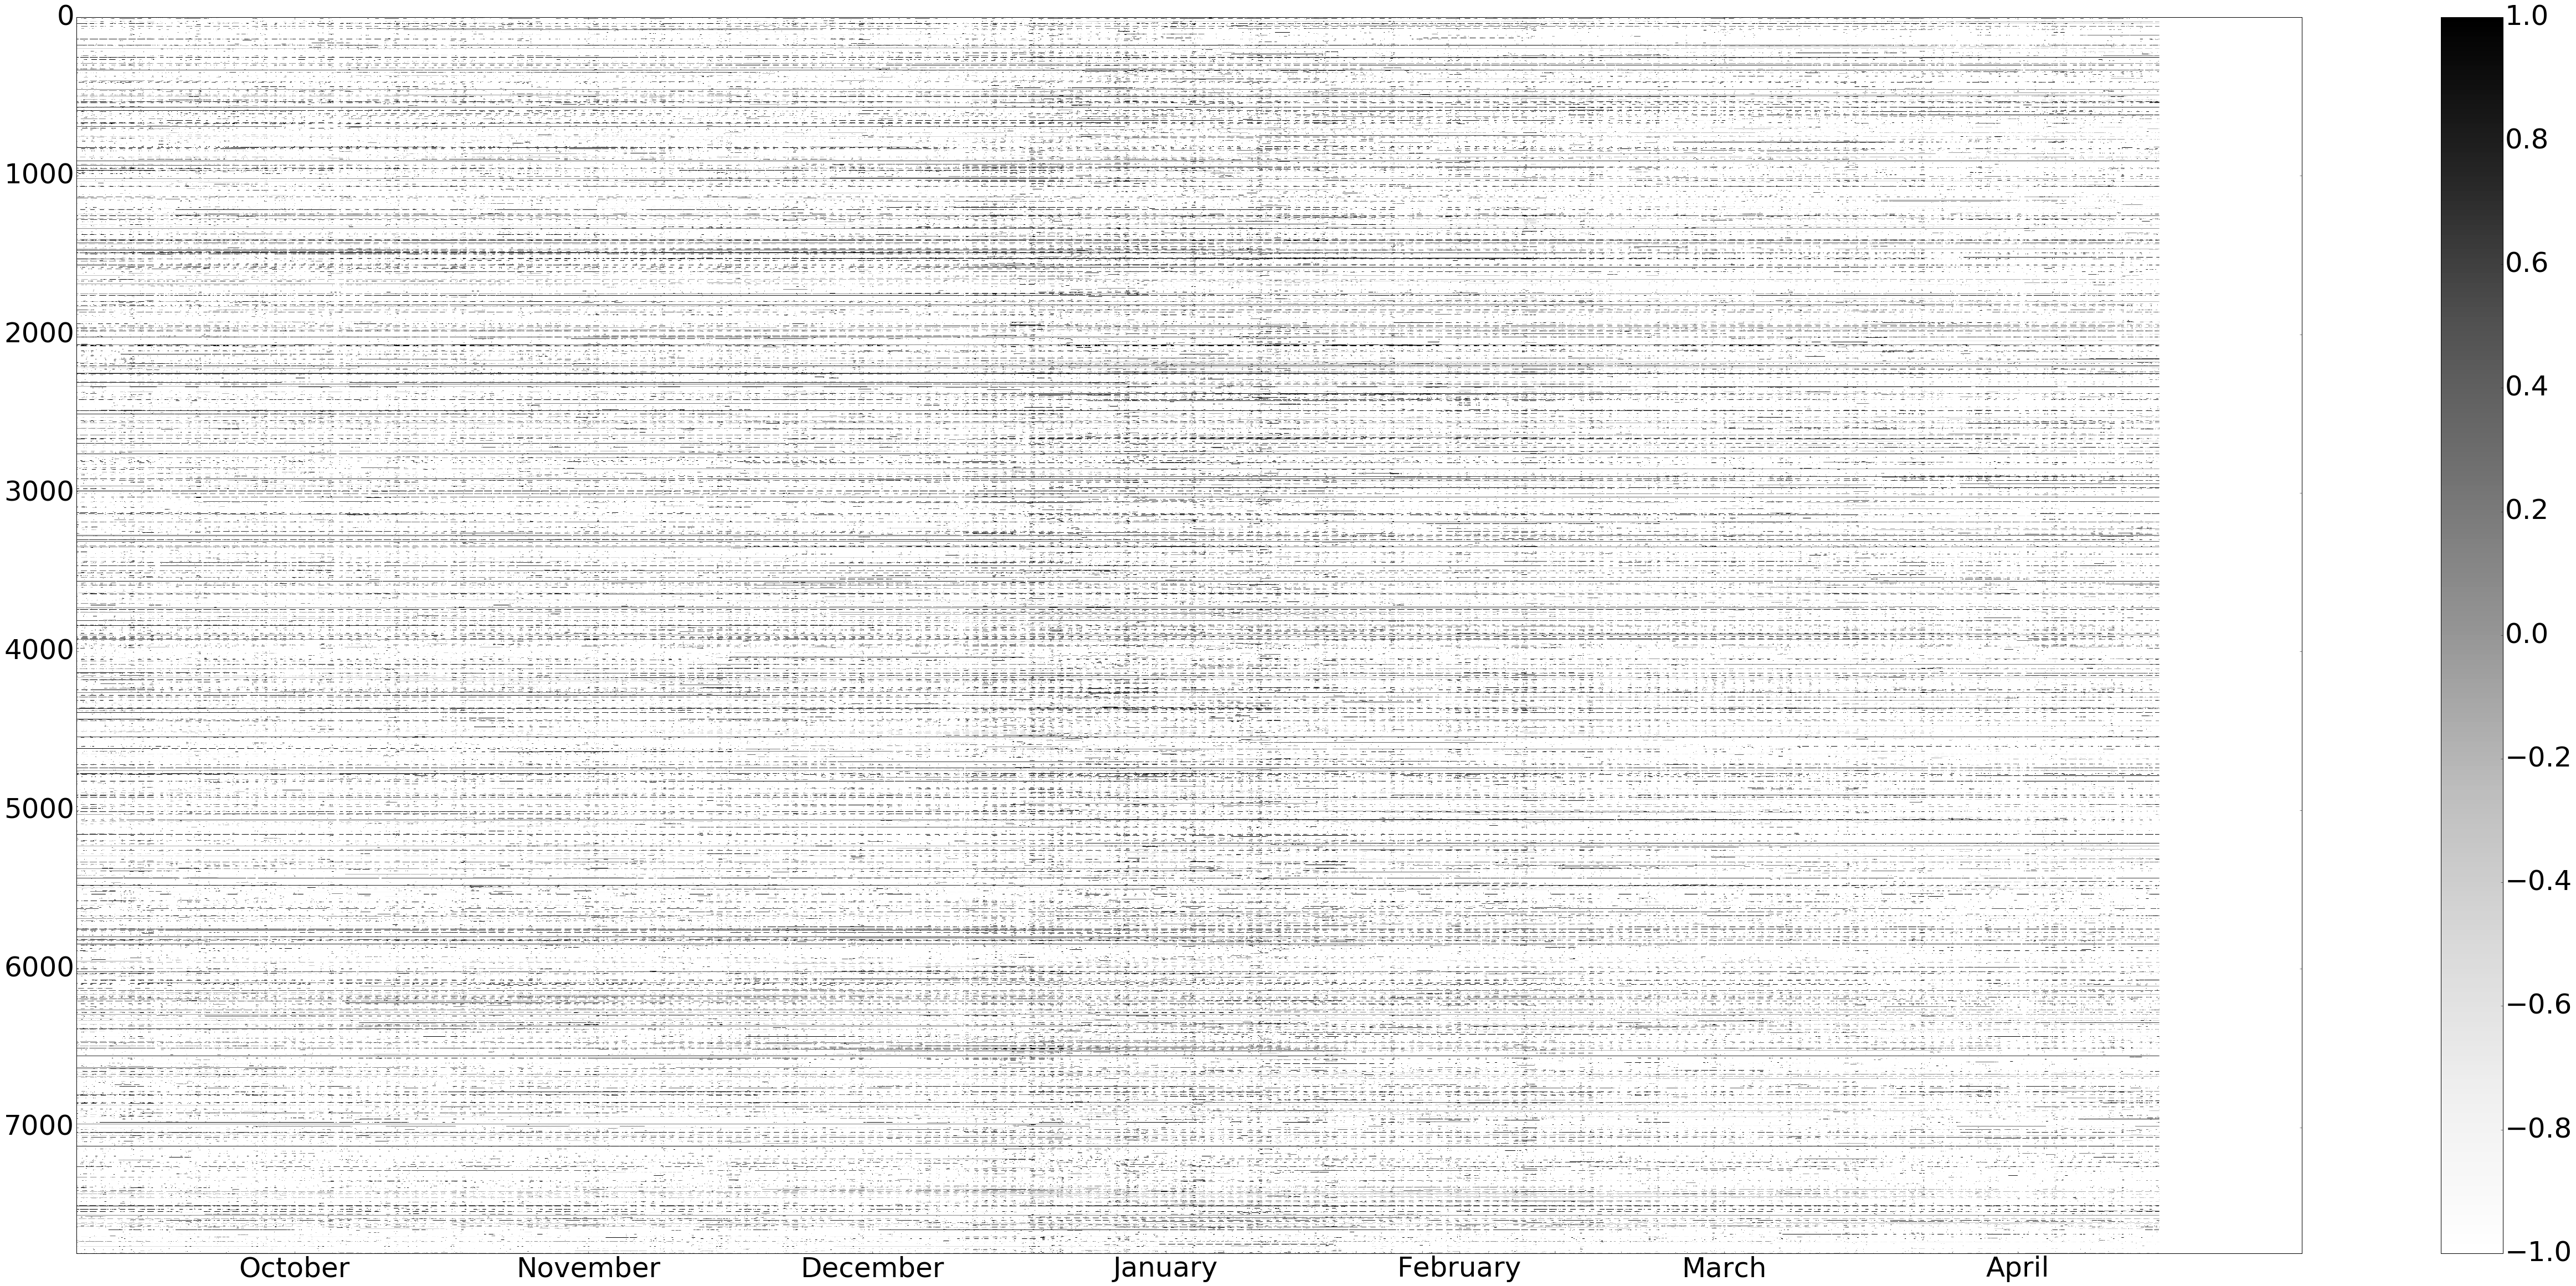

In [175]:
pl.imshow(degraded, cmap='Greys', aspect='auto')
pl.xticks([i + 15*24 for i in x_month], [month for month in months])
pl.colorbar()

### Recall

In [176]:
r,p = degraded.shape

In [177]:
def recall(W, patterns, steps=5):
    #The tests the network. You give it a pattern and see what it produces
    from numpy import vectorize, dot #vector calculus functions
    sgn = vectorize(lambda x: -1 if x<0 else +1) # convert input pattern into a -1/+1 pattern
    for _ in xrange(steps): #over a number of iterations (defined by 'steps')    
        print _
        patterns = sgn(dot(W, patterns)) #adjust the neuron activity to reflect the weights
    return patterns #return the final pattern

In [138]:
recalled = recall(W/r, degraded, steps=10)

0
1
2
3
4
5
6
7
8
9


In [187]:
summary = [sum(l) for l in np.array(recalled).T]

([<matplotlib.axis.XTick at 0x7fe00f581590>,
 <a list of 7 Text xticklabel objects>)

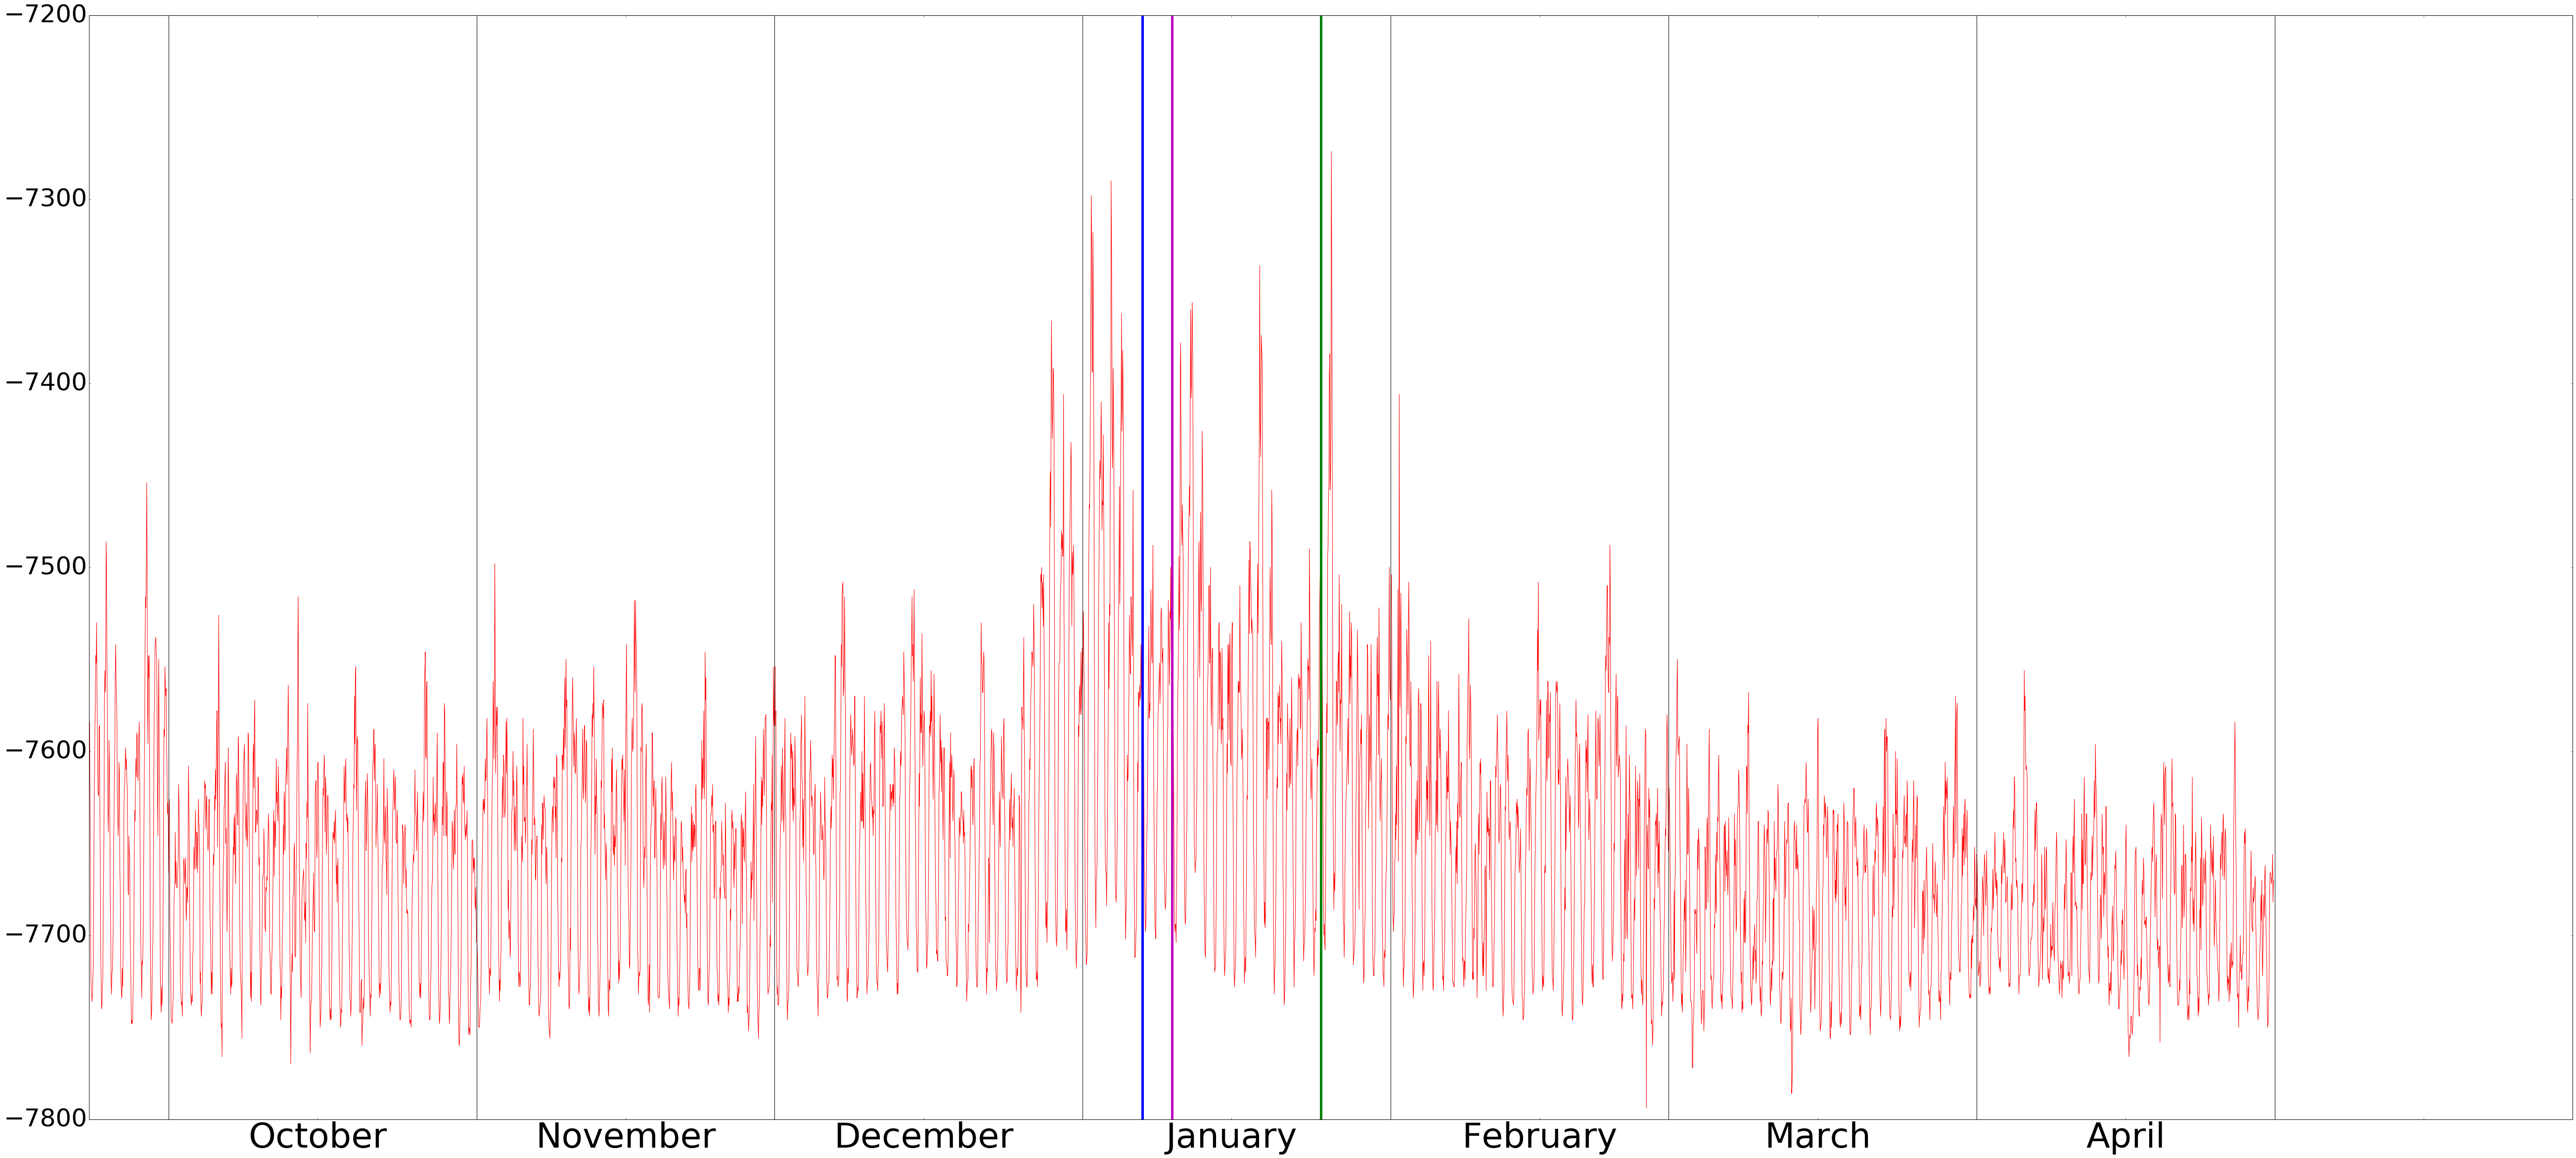

In [208]:
pl.plot(summary, 'r')
for xc in x_month:
    pl.axvline(x=xc, linewidth=1, color = 'black')
pl.axvline(x = x_month[3] + 6*24, linewidth=5, color = 'b') #Charlie Hebdo
pl.axvline(x = x_month[3] + 24*24, linewidth=5, color = 'g') #Miss Universe
pl.axvline(x = x_month[3] + 9*24, linewidth=5, color = 'm') #Golden Globe
# pl.axvline(x = x_month[3] + 17*24, linewidth=3, color = 'b') #
pl.xticks([i + 15*24 for i in x_month], [month for month in months])

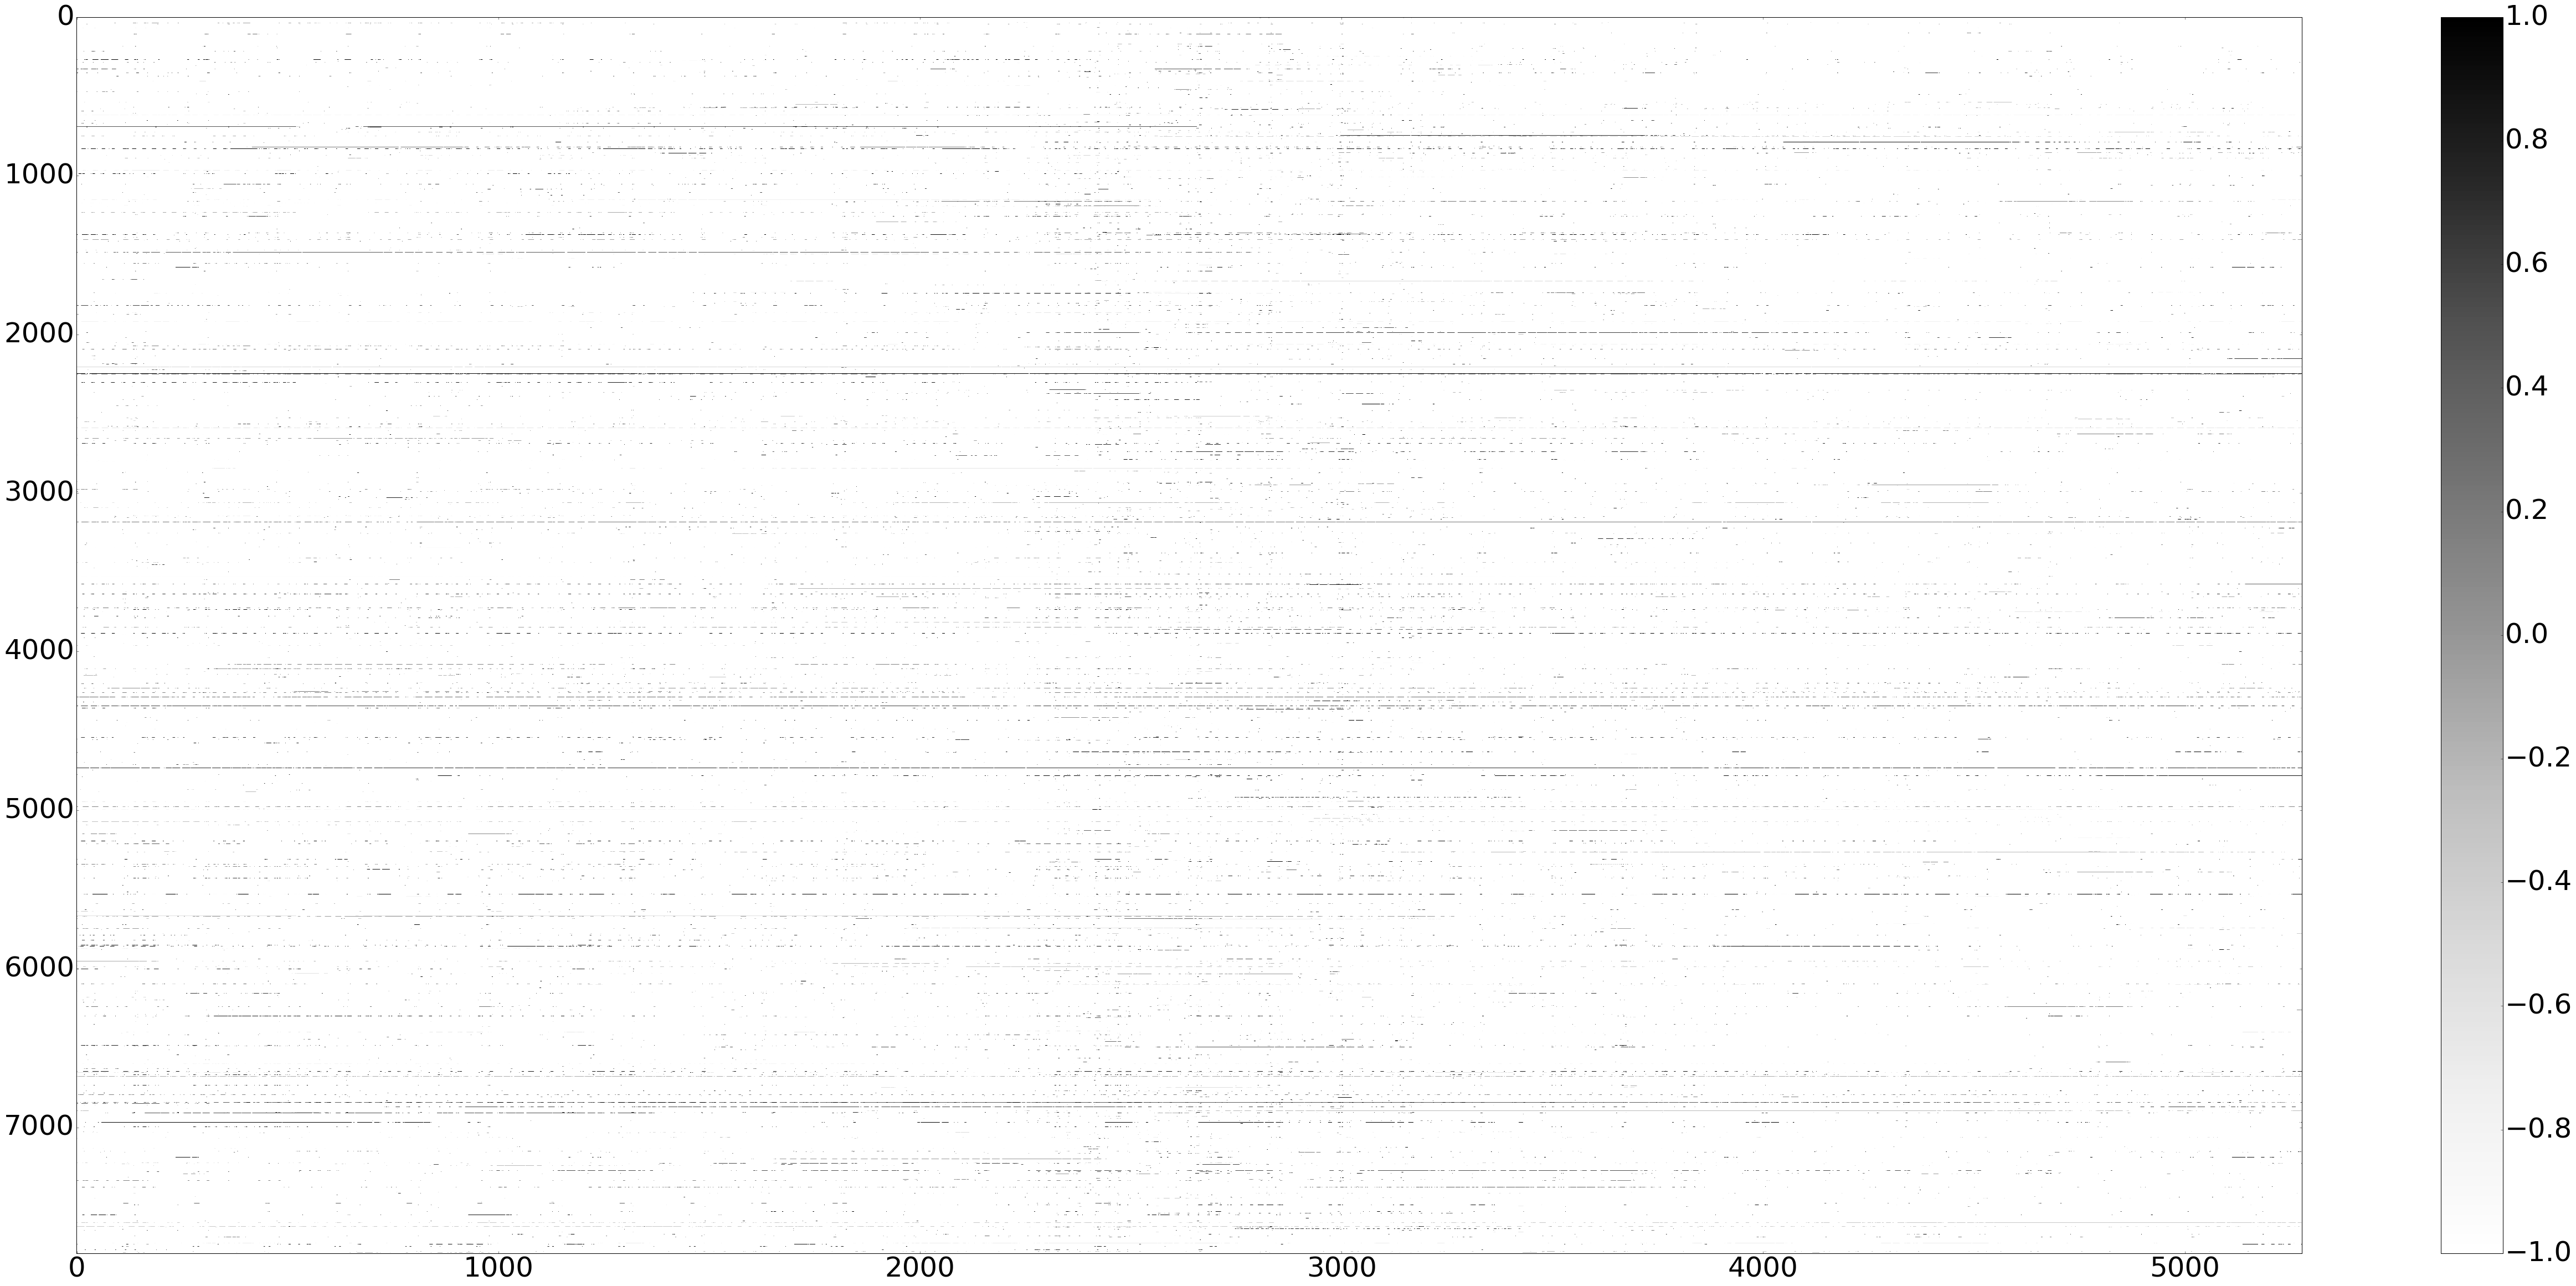

In [181]:
pl.imshow(recalled, cmap='Greys', aspect='auto')
pl.colorbar()